# Credit Card Fraud Use Case

This use case detects if the a particular person is going to default or not in the next month's payment. This uses the data quality module along with other sandard Python modules. 



## Dataset Information

The dataset used in the use case, is taken from the public domain (UCI repository) and contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

There are total 25 features in the dataset and some of them are listed below :-

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)


### Import necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from data_analysis import profile_data, univariate, bivariate, multivariate, stats, outlier_detection, impute, noise_detection,skewness,find_kurtosis

### Load dataset

In [2]:
data = pd.read_csv('UCI_Credit_Card.csv')

### Analyse dataset

In [3]:
data.head(7)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24.0,2,2.0,-1.0,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,1,26.0,-1,2.0,0.0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34.0,0,0.0,0.0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,1,1,37.0,0,0.0,0.0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,NaN,-1,NaN,-1.0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37.0,0,0.0,0.0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29.0,0,0.0,NaN,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0


In [4]:
data.rename(columns={"default.payment.next.month": "Default"}, inplace=True)
data.drop('ID', axis = 1, inplace =True)

In [5]:
data.shape

(30000, 24)

### Statistics

For analysing any dataset, its very important to see the quick statistics of the data like mean/median/mode and other similar attributes.
Data_analysis library's stats() does this work. This method takes the dataset as input and returns the descriptive statistics of each feature. It includes the number of observations, mean, standard deviation of the observations, minimum and maximum values along with the percentile (25,50 and 75) values. 

For example - Stats of this use case can be seen by passing the entire dataset to stats() method.

In [6]:
stats(data)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
count,30000.000000,30000.000000,30000.000000,30000.000000,29998.000000,30000.000000,29998.000000,29999.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167477.656000,1.603733,1.853067,1.551833,35.484266,-0.016700,-0.133742,-0.166206,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129710.016716,0.489129,0.790336,0.521973,9.216939,1.123802,1.197215,1.196887,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Data Profiling

Understanding the data is very important before proceeding to any further analysis. Data_analysis library's profile_data() method gives information about the dataset - overview, feature importance, the variable types, distribution of the variables, their statistics, the correlation plots and a sample of the dataset. This method is very helpful in getting a basic understanding of how the data is distributed. 

For example - in this use case, we can pass data and the target variable name ('Default) and it will profile the data and show the report to us.

In [7]:
profile_data(data,'Default')

Number of columns,25
Number of observations,29996
Total Missing (%),0.0%
Total size in memory,5.7 MiB
Average record size in memory,200.0 B
Numeric,18
Categorical,0
Boolean,2
Date,0
Text (Unique),0
Rejected,5


### Univariate Analysis


Univariate analysis is the simplest form of data analysis where the data being analyzed contains only one variable at a time. Since it's a single variable analysis, it doesn’t deal with relationship with other variables.The main purpose of univariate analysis is to describe the data and find patterns that exist within it.  

For example, in this use case i.e. "UCI Credit Card" dataset, variables like AGE, LIMIT_BAL, etc. can be analysed by importing  univariate function from data_analysis library which plots a univariate distribution of observations consisting histogram(graphical display of data using bars of different heights) with a line on it.

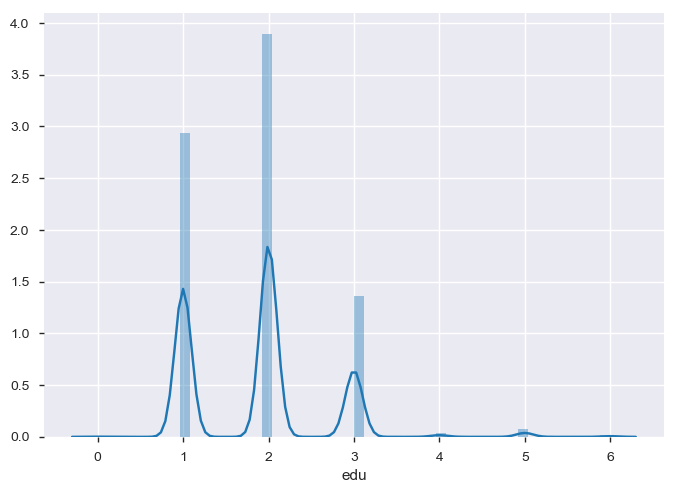

In [8]:
univariate(data['EDUCATION'],norm_hist=True, axlabel='edu')

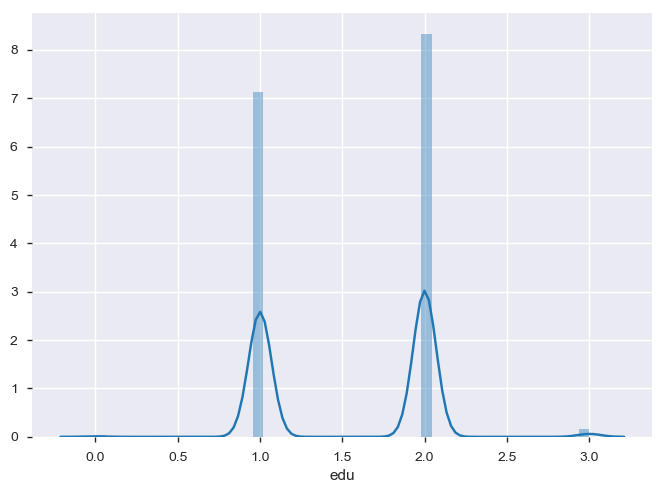

In [9]:
univariate(data['MARRIAGE'],norm_hist=True, axlabel='edu')

### Bivariate Analysis

Bivariate analysis is used to find out if there is any relationship between two different variables and are plotted on X and Y axes. 
Plots for bivariate analysis can include boxplot, jointplot, pairplot, countplot, scatterplot, lineplot, etc. 

All of these plots are available in data_analysis library's bivariate() function.This function can take arguements  like "type" of plot which we want to see & x, y for the purpose of determining the empirical relationship between them. 

For example, here we can see the relationship among variables like AGE and EDUCATION using jointplot & can see the count of different ages in AGE variable using countplot.

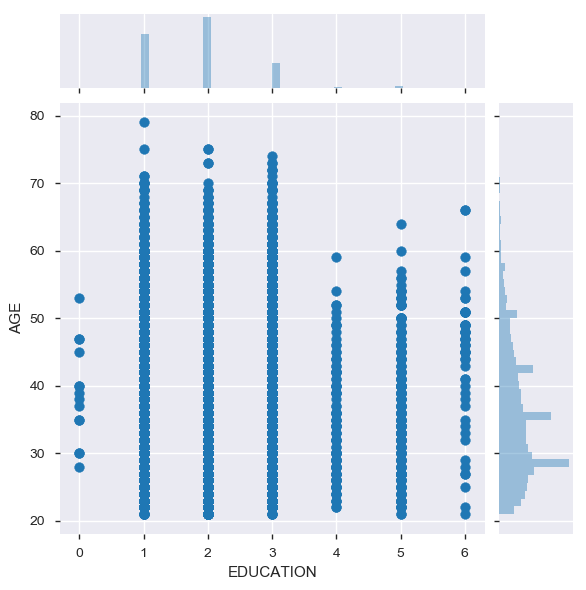

In [10]:
bivariate(type='joint',x=data['EDUCATION'],y=data['AGE'])

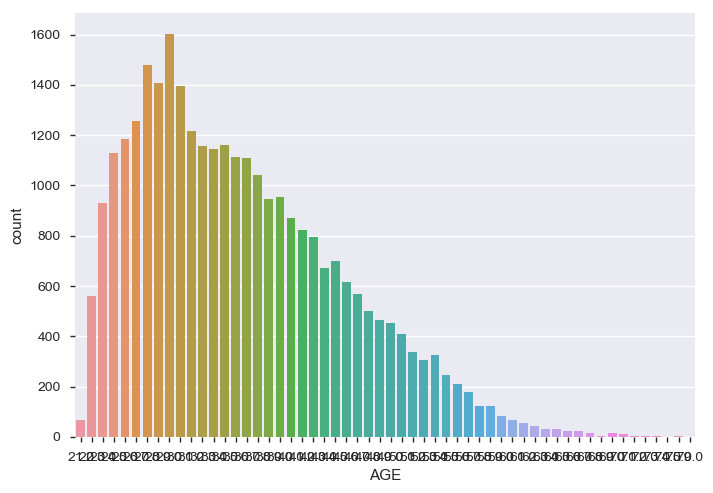

In [11]:
bivariate(type='count',x='AGE',data=data)

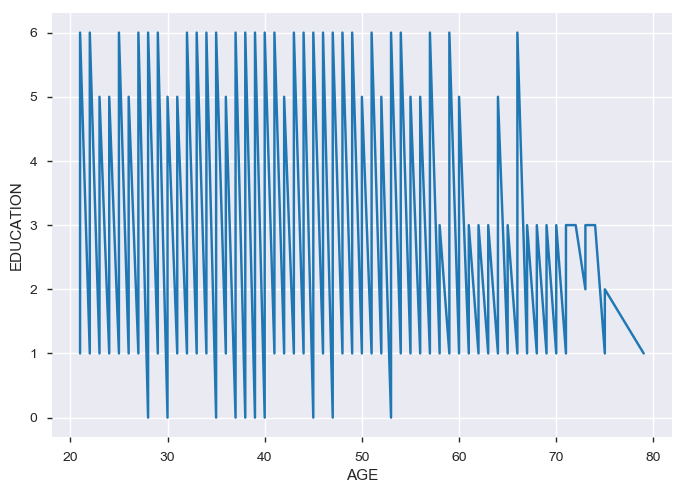

In [12]:
bivariate(type='line',x='AGE',y='EDUCATION',data=data)

C:\Users\manmohansh\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\manmohansh\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


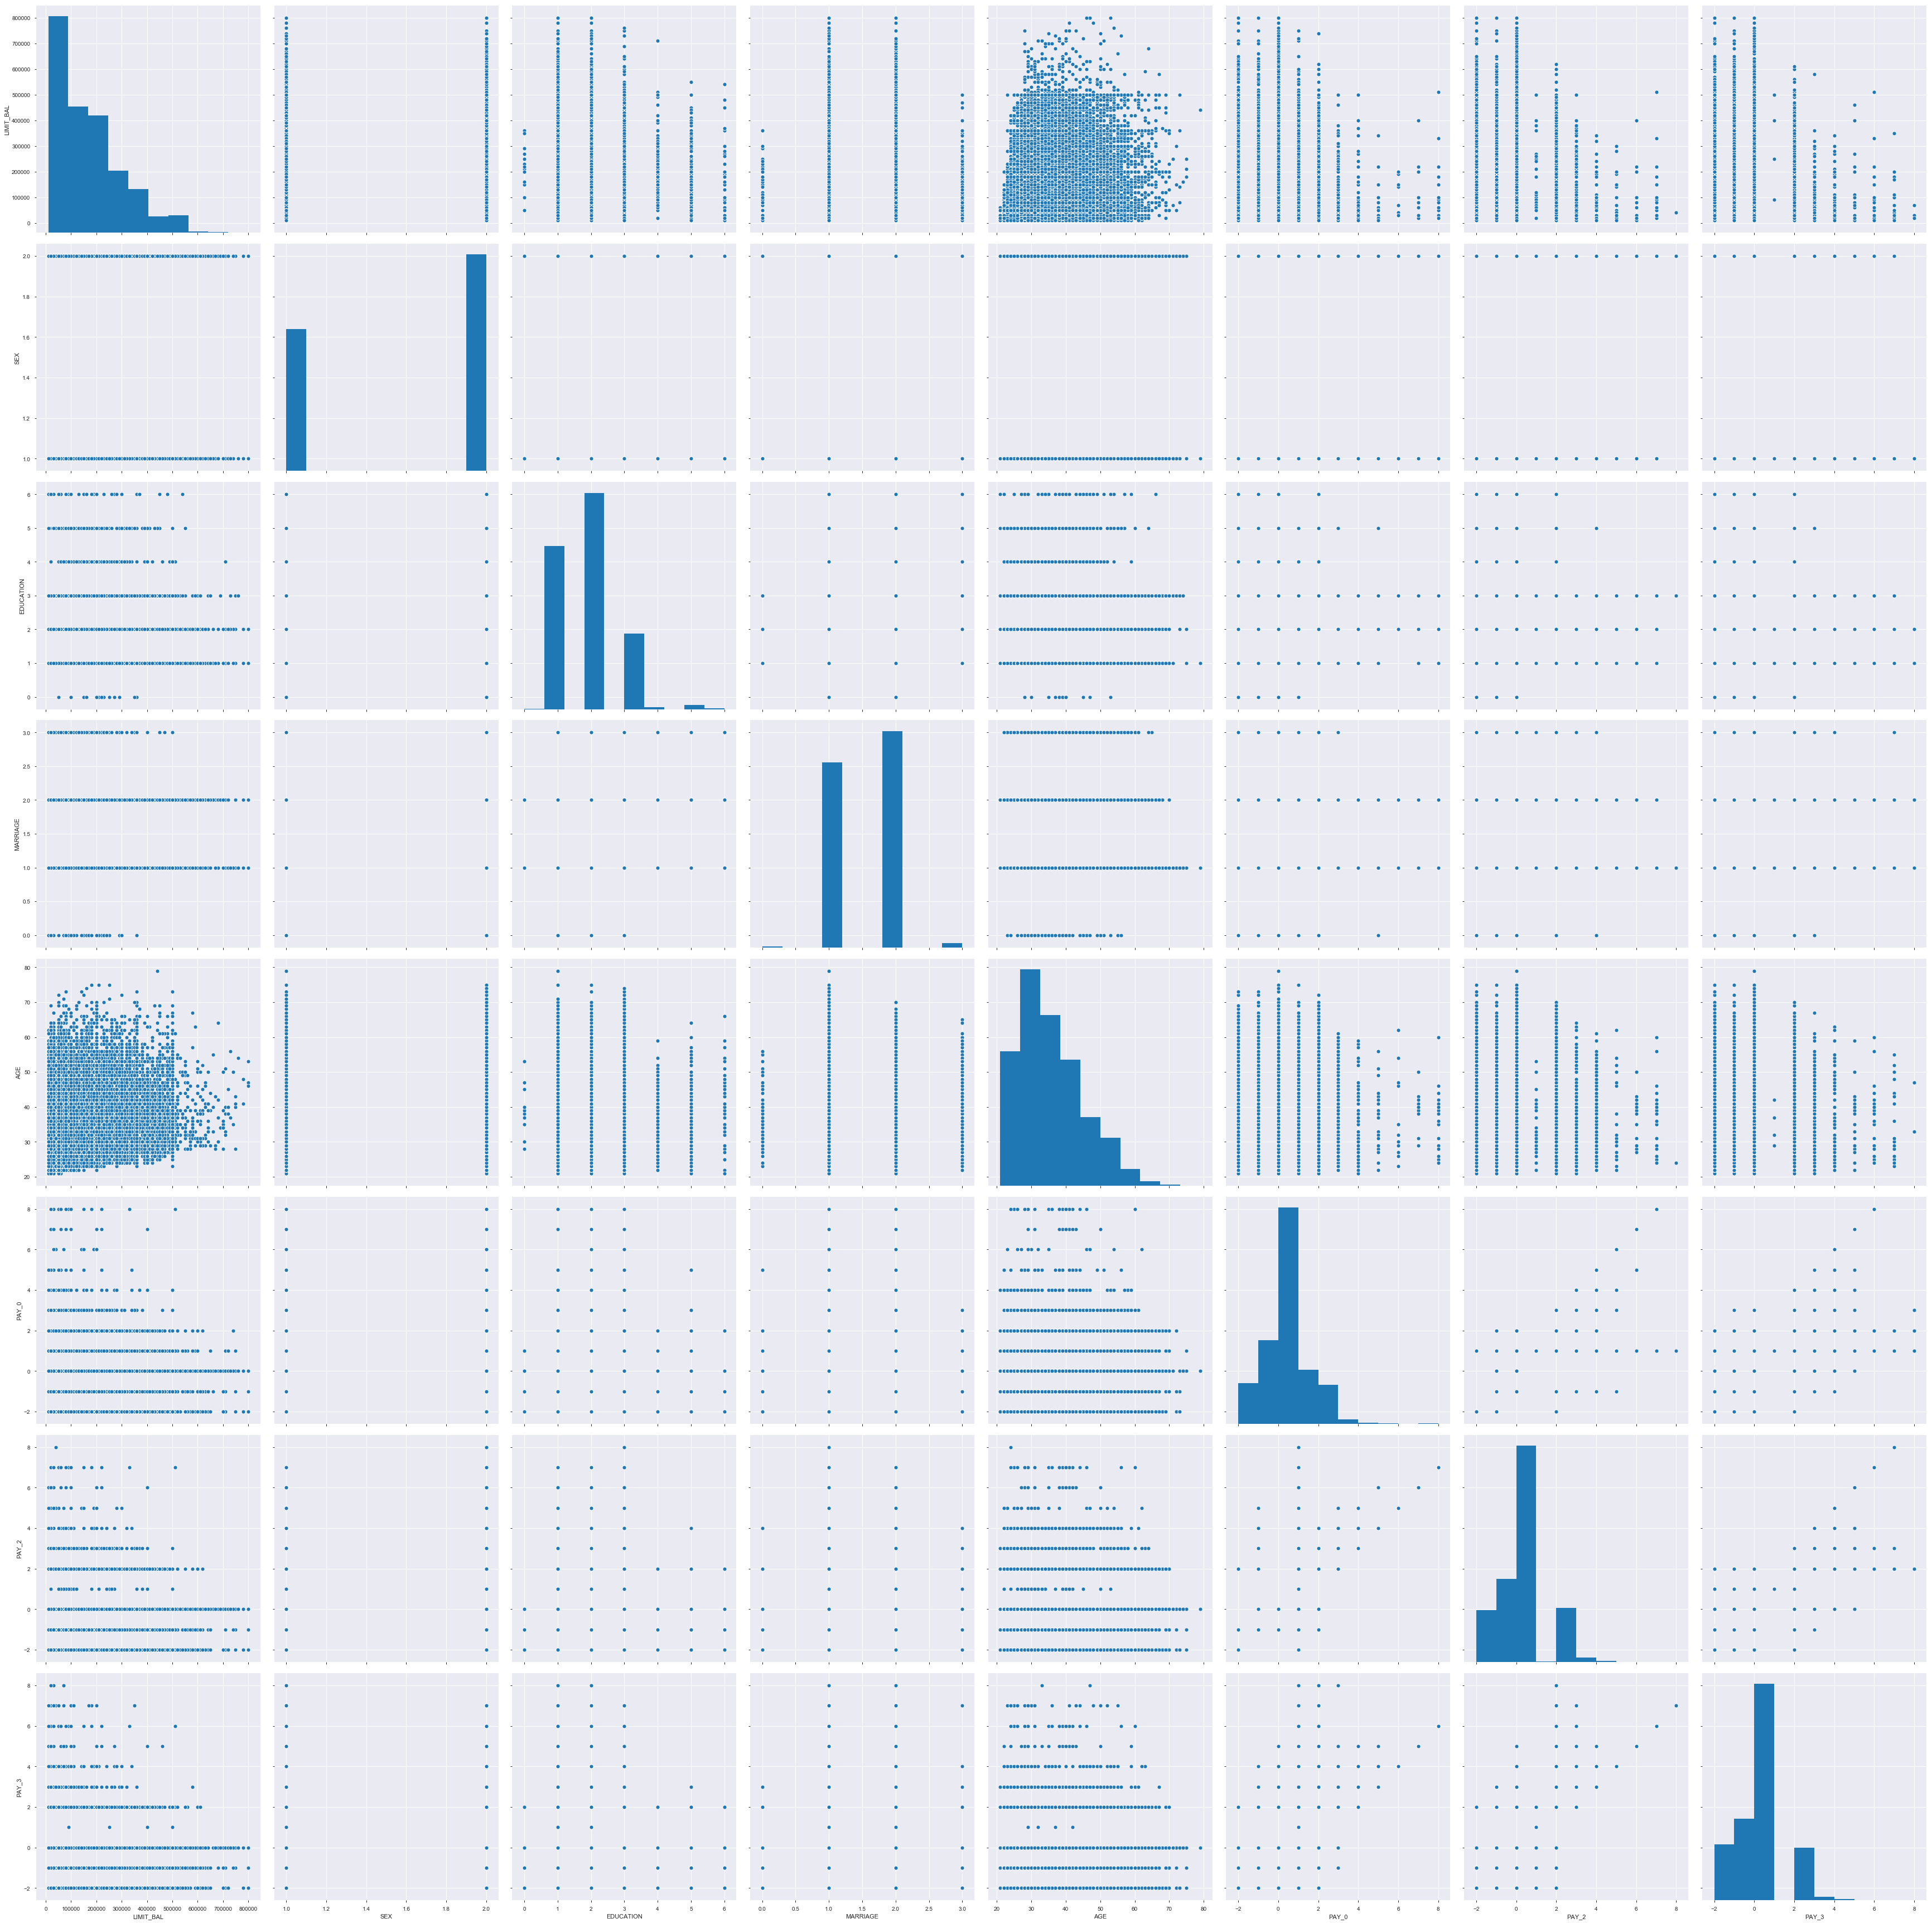

In [36]:
bivariate(type='pair',data=data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3']])

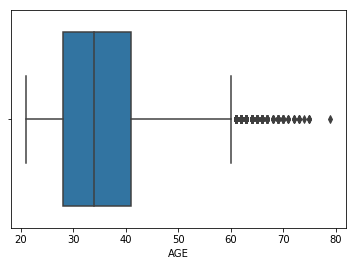

In [21]:
bivariate(type='box',x='AGE', data=data)

In [22]:
import seaborn as sn

In [39]:
sn.set_context('poster', font_scale = 1) 

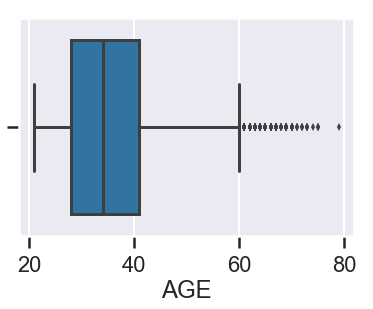

In [40]:
bivariate(type='box',x='AGE', data=data, sns = sn)

### Multivariate Analysis

Multivariate analysis is used for analysis of data that contain more than one variable and it helps in seeing how the variables are related with each other. 

In data_analysis library, multivariate function use heatmap plot to reveal the relationship among several variables simulataneously. 
For example - In this use case, entire dataset was passed as an argument to the function and it plotted the graph for all of the variables.

We can pass the dataframe with less number of variables, which will show the relationship among them.

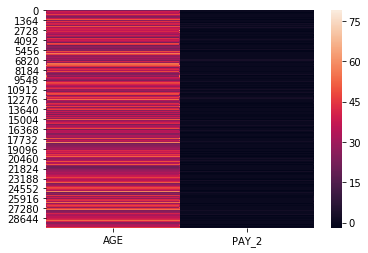

In [4]:
multivariate(data[['AGE','PAY_2']])

In [50]:
data['SEX'] = data['SEX'].astype('str')
data['EDUCATION'] = data['EDUCATION'].astype('str')
data['MARRIAGE'] = data['MARRIAGE'].astype('str')
data['PAY_0'] = data['PAY_0'].astype(object)
data['PAY_2'] = data['PAY_2'].astype(object)
data['PAY_3'] = data['PAY_3'].astype(object)
data['PAY_4'] = data['PAY_4'].astype(object)
data['PAY_5'] = data['PAY_5'].astype('str')
data['PAY_6'] = data['PAY_6'].astype('str')
data['Default'] = data['Default'].astype(object)

### Missing Value Treatment

Data can have missing values for a number of reasons such as observations that were not recorded and data corruption.
Handling missing data is important as many machine learning algorithms do not support data with missing values.

Data_analysis library's impute() method uses two Machine Learning Algorithms for imputing the missing values. They are Linear Regression and Random Forest Classifier.

The user can either choose a feature for which the missing values should be imputed or pass the entire data as input. The missing values in other numerical columns (other than the feature in which we are imputing the missing values) are initially imputed with mean value of respective feature and then used as independent features to fit a Linear Regression Algorithm. 
The values obtained for the missing values in the feature which user passes will be replaced with the regression outputs in the original data. Similarly, Random Forest Classifier Algorithm is used for imputing the missing values in categorical variables. 

For example - the dataset has some missing values in 'AGE', 'PAY_2' and 'PAY_3' columns, once this is passed to the impute() method, daatset with imputed missing values is returned.

In [51]:
data.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000.0,2,2,1,24.0,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,1,26.0,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34.0,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,1,1,37.0,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,NaN,-1,NaN,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,50000.0,1,1,2,37.0,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,500000.0,1,1,2,29.0,0,0,NaN,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,100000.0,2,2,2,23.0,0,NaN,-1,0,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,140000.0,2,2,1,28.0,0,0,2,0,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,20000.0,1,3,2,35.0,-2,-2,-2,-2,-1,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [52]:
#df = impute(data,col_name ='AGE',col_type='continuous',algo_name = 'LR' )
#df = impute(data,col_name ='PAY_2',col_type='categorical',algo_name = 'RFC' )
data = impute(data)

In [53]:
data.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000.0,2,2,1,24.0,2,2.0,-1.0,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,1,26.0,-1,2.0,0.0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34.0,0,0.0,0.0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,1,1,37.0,0,0.0,0.0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,34.0,-1,-1.0,-1.0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,50000.0,1,1,2,37.0,0,0.0,0.0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,500000.0,1,1,2,29.0,0,0.0,0.0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,100000.0,2,2,2,23.0,0,-1.0,-1.0,0,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,140000.0,2,2,1,28.0,0,0.0,2.0,0,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,20000.0,1,3,2,35.0,-2,-2.0,-2.0,-2,-1,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [54]:
data.shape

(29965, 24)

### Outlier Detection

An outlier is a data point that differs significantly from other observations. Outlier detection is very important for building an accurate model to get good results. 
Data_analysis library has outlier_predition() method that helps to detect the outliers in the dataset by using five different Machine Learning Algorithms - Isolation Forest, DBSCAN, Local Outlier Factor, Elliptical Envelope and One Class Support Vector Machine. 

The IsolationForest algorithm ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

DBSCAN algorithm groups together, points that are close to each other based on a distance measurement and a minimum number of points. It marks the points that are in low-density regions as outliers.

Local Outlier Factor algorithm measures the local deviation of density of a given sample with respect to its neighbors. By comparing the local density of a sample to the local densities of its neighbors, it identifies samples that have a substantially lower density than their neighbors and considers them as outliers.

Elliptic Envelope assumes that our data is Gaussian distributed. It will define the shape of the data we have, creating a frontier (which is elliptical in shape) that delimits the contour.

One-class SVM algorithm is trained on data that has only one class, which is the “normal” class. It infers the properties of normal cases and from these properties can predict which examples are unlike the normal examples. 

outlier_prediction() method takes the data and algorithm type as input and detects the outliers depending on the method user chooses and returns the outliers(as a separate dataframe), original dataset without outliers(as a separate dataframe) and the outlier labels for the dataset (Eg: 1,0,-1 etc, where '-1' always indicates an outlier). These outlier labels are useful for visualization purpose when using scatter plots. 

In [55]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [56]:
df1, outliers, out_lab = outlier_prediction(data)

In [57]:
outliers.shape

(26, 24)

In [58]:
df1.shape

(29939, 24)

In [59]:
palette=['red','grey']

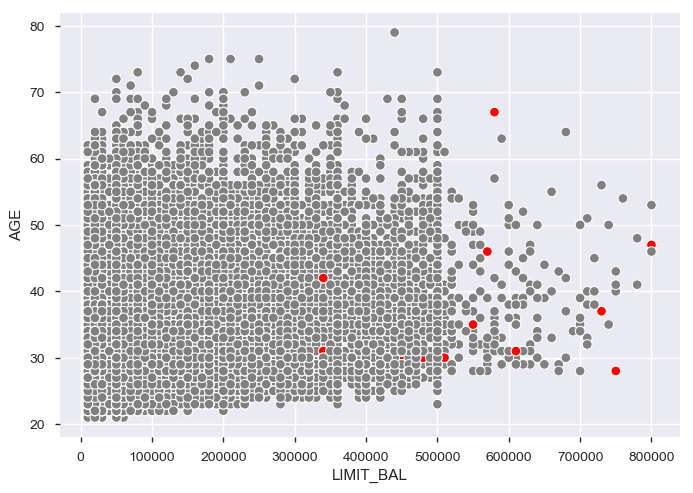

In [60]:
bivariate(type='scatter',x=data['LIMIT_BAL'],y=data['AGE'], hue = out_lab, legend = None, palette = palette ) #For Outliers

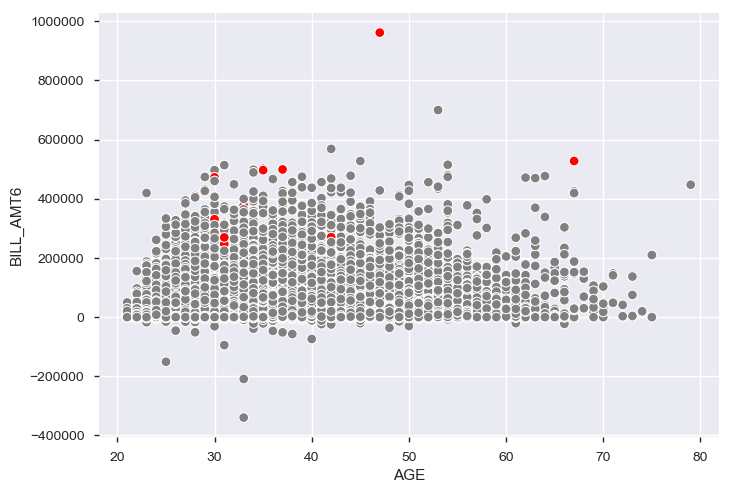

In [61]:
bivariate(type='scatter',x=data['AGE'],y=data['BILL_AMT6'], hue = out_lab, legend = None, palette = palette)

### Noise Reduction

Noisy data represents the data which is corrupted, distorted or a data with large amount of meaningless information. Noise is predominant in Signalling and Time Series related data. Noise reduction helps in enhancing data analysis. 

Data_analysis library's noise_detection() method is used to detect and reduce the noise in the data. It uses two filtering methods for reducing the Noise. They are 'savgol' (Savitzky-Golay filter) and 'lfilter'. The Savitzky-Golay filter removes high frequency noise from data.It has the advantage of preserving the original shape and features of the signal better than other types of filtering approaches, such as moving averages techniques. The lfilter filters data along one-dimension with an IIR or FIR filter. It uses a digital filter for reducing noise.

Our noise_detection() method takes the data and method as inputs and returns the data(as a dataframe) after reducing the noise.

For example the below 2 graphs show data of 'LIMIT_BAL' columns before and after the noise reduction.

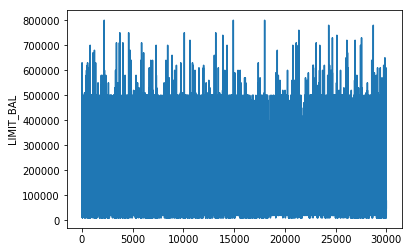

In [13]:
x = np.arange(0, len(data), 1)
bivariate(type='line',x=x, y= data['LIMIT_BAL'])

In [9]:
from data_analysis import noise_detection
df_clean = noise_detection(data, method = 'savgol')

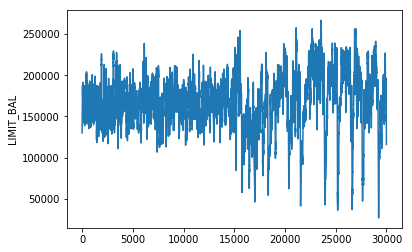

In [12]:
x = np.arange(0, len(data), 1)
bivariate(type='line',x=x, y= data['LIMIT_BAL'])

In [3]:
sk = skewness(data['LIMIT_BAL'],data)
sk

Exception occurred in skewness() in data quality module
'[ 20000. 120000.  90000. ...  30000.  80000.  50000.] not in index'


In [6]:
kurt = find_kurtosis(data['LIMIT_BAL'])

In [7]:
kurt

0.5025633210691343